<a href="https://colab.research.google.com/github/sunnyyashu178/DataScience-Projects/blob/master/polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [166]:
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)
df = pd.DataFrame()
df["X"] = X.reshape(100,)
df["y"] = y
df

,X,y
0,-0.854769,1.466489
1,-0.567316,2.026808
2,-0.818795,1.838251
3,-2.096218,0.180852
4,0.431956,2.511699
...,...,...
95,1.395513,5.792963
96,1.400121,4.036031
97,-2.250435,1.801714
98,-1.011552,1.096045


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


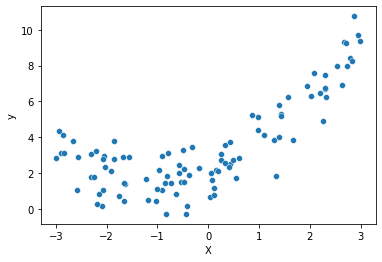

In [167]:
sns.scatterplot("X","y",data=df)

In [168]:
from sklearn.preprocessing import PolynomialFeatures

In [169]:
poly_features = PolynomialFeatures(degree=2,include_bias = False)

In [170]:
X_poly = poly_features.fit_transform(X)

In [171]:
X[0], X_poly[0]

(array([-0.85476853]), array([-0.85476853,  0.73062923]))

In [172]:
from sklearn.linear_model import LinearRegression

In [173]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.08031247]), array([[1.04198322, 0.4903198 ]]))

In [174]:
y_predict = lin_reg.predict(X_poly)

In [175]:
df["X1"] = X_poly[:,0]

In [176]:
df["X^2"] = X_poly[:,1] 

In [177]:
df.head()

,X,y,X1,X^2
0,-0.854769,1.466489,-0.854769,0.730629
1,-0.567316,2.026808,-0.567316,0.321847
2,-0.818795,1.838251,-0.818795,0.670425
3,-2.096218,0.180852,-2.096218,4.394132
4,0.431956,2.511699,0.431956,0.186586


In [178]:
df.drop("X",axis=1,inplace=True)

In [179]:
df["y_pred"] = y_predict

In [180]:
df.head()

,y,X1,X^2,y_pred
0,1.466489,-0.854769,0.730629,1.547900
1,2.026808,-0.567316,0.321847,1.646987
2,1.838251,-0.818795,0.670425,1.555865
3,0.180852,-2.096218,4.394132,2.050618
4,2.511699,0.431956,0.186586,2.621890


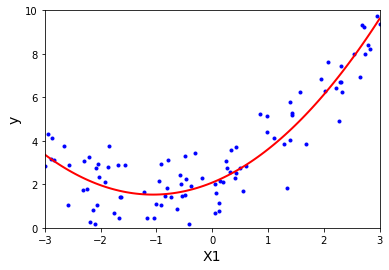

In [181]:
plt.plot(X,y,"b.")
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X_new, lin_reg.predict(poly_features.transform(X_new)), 'r-',linewidth=2)
plt.axis([-3,3,0,10])
plt.xlabel("X1",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.show()

In [182]:
poly_2 = PolynomialFeatures(degree=2,include_bias = False)
X_poly2 = poly_2.fit_transform(X)
poly_1 = PolynomialFeatures(degree=1,include_bias = False)
X_poly1 = poly_1.fit_transform(X)
poly_300 = PolynomialFeatures(degree=300,include_bias = False)
X_poly300 = poly_300.fit_transform(X)

# Learning Curves

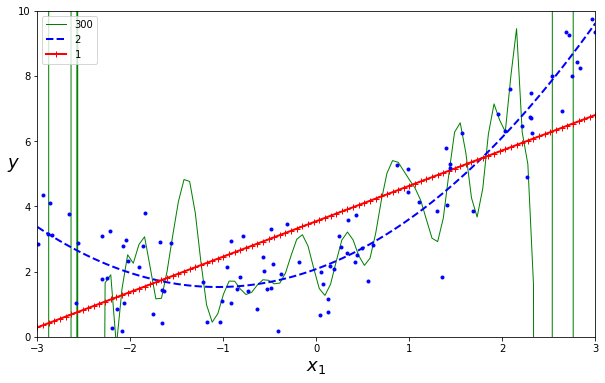

In [183]:
plt.figure(figsize=(10,6))
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()


In [184]:
from sklearn.metrics import mean_squared_error

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
def plot_learning_curves(model,X,y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict,y_val))
  plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
  plt.plot(np.sqrt(val_errors),"b-",linewidth=2,label="test")
  plt.legend()

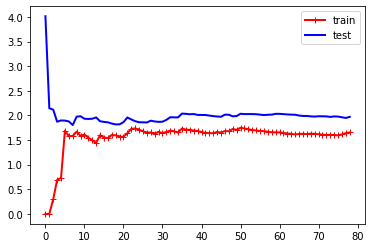

In [187]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

If your model is underfitting the training data, adding more train‐
ing examples will not help. You need to use a more complex model
or come up with better features.  
Let’s look at the learning curves of a 10th-degree polynomial model on the same
data

In [188]:
from sklearn.pipeline import Pipeline

In [189]:
polynomial_regression = Pipeline((
                                ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                                ("sgd_reg", LinearRegression())
                                ))

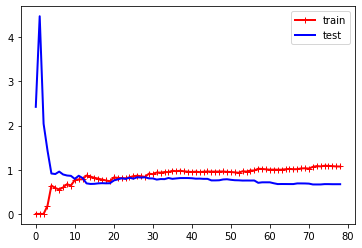

In [190]:
plot_learning_curves(polynomial_regression,X,y)